# Import, options

In [1]:
import numpy, seaborn, pandas
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(8, 5), 'svg.fonttype' : 'none'})

In [3]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# Data Download

In [4]:
%%time
#data mouse_NPC
df = pandas.read_csv(file_directory+'1) input/NPC_H3K36me3_AllPeaks_SEACR.csv',
                               sep = ',')
print(df.shape)
df.head()

(42879, 23)
CPU times: total: 62.5 ms
Wall time: 230 ms


,seqnames,start,end,width,strand,Conc,Conc_32,Conc_37,Fold,p.value,...,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME
0,chr16,29445753,29446153,401,*,6.833861,0.0,7.833861,-17.182478,1.322149e-11,...,29425800,29447026,21227,2,100422558,ENST00000532337.1,873,ENSG00000254634,SMG1P6,SMG1 pseudogene 6
1,chr1,144453062,144453462,401,*,6.751868,0.0,7.751868,-16.860628,5.894429e-11,...,144423930,144459380,35451,2,284565,ENST00000584793.7,5918,ENSG00000266338,NBPF15,NBPF member 15
2,chr4,103139323,103139723,401,*,8.130049,0.0,9.130049,-10.689641,1.304364e-10,...,103145303,103145781,479,2,1062,ENST00000515478.1,6058,ENSG00000138778,CENPE,centromere protein E
3,chr8,58629710,58630110,401,*,7.955882,0.0,8.955882,-10.539568,2.025052e-10,...,58601168,58623419,22252,2,8439,ENST00000519858.1,-6291,ENSG00000035681,NSMAF,neutral sphingomyelinase activation associated...
4,chr3,183717667,183718067,401,*,7.777551,0.0,8.777551,-10.345687,7.394206e-10,...,183697797,183812624,114828,1,55689,ENST00000305135.10,19870,ENSG00000163872,YEATS2,YEATS domain containing 2


In [6]:
df.columns

Index(['seqnames', 'start', 'end', 'width', 'strand', 'Conc', 'Conc_32',
       'Conc_37', 'Fold', 'p.value', 'FDR', 'annotation', 'geneChr',
       'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'geneId',
       'transcriptId', 'distanceToTSS', 'ENSEMBL', 'SYMBOL', 'GENENAME'],
      dtype='object')

In [7]:
columns = ['Conc', 'Conc_32','Conc_37', 'Fold', 
'p.value', 'FDR', 'annotation', 'geneChr', 'geneStart', 'geneEnd', 'geneLength', 
'geneStrand', 'geneId', 'distanceToTSS', 'SYMBOL', 'GENENAME']

df = df[columns]
df.head()

,Conc,Conc_32,Conc_37,Fold,p.value,FDR,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS,SYMBOL,GENENAME
0,6.833861,0.0,7.833861,-17.182478,1.322149e-11,5.679423e-07,Promoter (<=1kb),16,29425800,29447026,21227,2,100422558,873,SMG1P6,SMG1 pseudogene 6
1,6.751868,0.0,7.751868,-16.860628,5.894429e-11,1.266005e-06,"Intron (ENST00000488031.6/284565, intron 2 of 19)",1,144423930,144459380,35451,2,284565,5918,NBPF15,NBPF member 15
2,8.130049,0.0,9.130049,-10.689641,1.304364e-10,1.867676e-06,"Intron (ENST00000380026.8/1062, intron 36 of 46)",4,103145303,103145781,479,2,1062,6058,CENPE,centromere protein E
3,7.955882,0.0,8.955882,-10.539568,2.025052e-10,2.174703e-06,"Intron (ENST00000038176.8/8439, intron 6 of 30)",8,58601168,58623419,22252,2,8439,-6291,NSMAF,neutral sphingomyelinase activation associated...
4,7.777551,0.0,8.777551,-10.345687,7.394206e-10,5.441575e-06,"Exon (ENST00000305135.10/55689, exon 3 of 31)",3,183697797,183812624,114828,1,55689,19870,YEATS2,YEATS domain containing 2


In [8]:
#p.value is probably not adj.p.value

## Add second file to compare

In [25]:
import random

In [18]:
df[['Fold', 'p.value']]

,Fold,p.value
0,-17.182478,1.322149e-11
1,-16.860628,5.894429e-11
2,-10.689641,1.304364e-10
3,-10.539568,2.025052e-10
4,-10.345687,7.394206e-10
...,...,...
42874,-0.000023,9.999072e-01
42875,0.000006,9.999253e-01
42876,0.000036,9.999322e-01
42877,0.000015,9.999717e-01


In [27]:
print(df['p.value'].max(), df['p.value'].min())

0.999983965818555 1.3221489060648399e-11


In [53]:
df2 = df[['Fold', 'p.value', 'SYMBOL']].copy()
print(df2.shape)
df2.head()

(42879, 3)


,Fold,p.value,SYMBOL
0,-17.182478,1.322149e-11,SMG1P6
1,-16.860628,5.894429e-11,NBPF15
2,-10.689641,1.304364e-10,CENPE
3,-10.539568,2.025052e-10,NSMAF
4,-10.345687,7.394206e-10,YEATS2


In [54]:
df2['Fold_rand'] = [random.uniform(-20, 10) for x in range(len(df2))]
df2['pvalue_rand'] = [random.uniform(0.002, 0.000000000000000000001) for x in range(len(df2))]
df2 = df2[['Fold_rand', 'pvalue_rand', 'SYMBOL']]
df2

,Fold_rand,pvalue_rand,SYMBOL
0,-5.640150,0.000751,SMG1P6
1,-12.481159,0.001621,NBPF15
2,0.938788,0.000211,CENPE
3,-16.719644,0.000178,NSMAF
4,1.882197,0.000764,YEATS2
...,...,...,...
42874,-12.743540,0.001705,CDC37
42875,-1.104553,0.000024,ZNF639
42876,-18.620637,0.000897,ANXA2
42877,-7.803290,0.000021,TBL1XR1


# VolcanoPlot

In [55]:
df[['Fold', 'p.value', 'SYMBOL']]

,Fold,p.value,SYMBOL
0,-17.182478,1.322149e-11,SMG1P6
1,-16.860628,5.894429e-11,NBPF15
2,-10.689641,1.304364e-10,CENPE
3,-10.539568,2.025052e-10,NSMAF
4,-10.345687,7.394206e-10,YEATS2
...,...,...,...
42874,-0.000023,9.999072e-01,CDC37
42875,0.000006,9.999253e-01,ZNF639
42876,0.000036,9.999322e-01,ANXA2
42877,0.000015,9.999717e-01,TBL1XR1


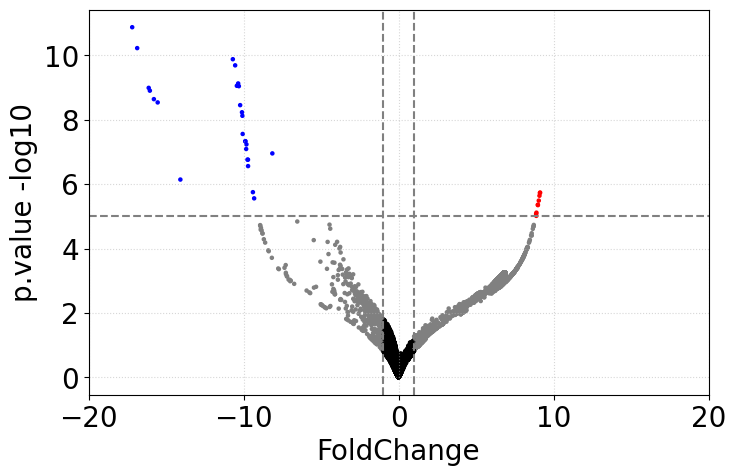

In [40]:
#volcano plot
colors = ['blue' if x < -1 and -numpy.log10(y) > 5 
          else 'red' if x > 1 and -numpy.log10(y) > 5
          else 'black' if x > -1 and x < 1
          else 'grey' for x, y in zip(df['Fold'], df['p.value'])]

# Plot, after convertion  y to log10(pvalue)
plt.scatter(x=df['Fold'],y=df['p.value'].apply(lambda x:-numpy.log10(x)),s=5,  c=colors) 
plt.xlim(-20, 20)
plt.xlabel("FoldChange")
plt.ylabel("p.value -log10")

plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(5,color="grey",linestyle="--")

title_file = 'volcano_NPC_H3K36me3'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')

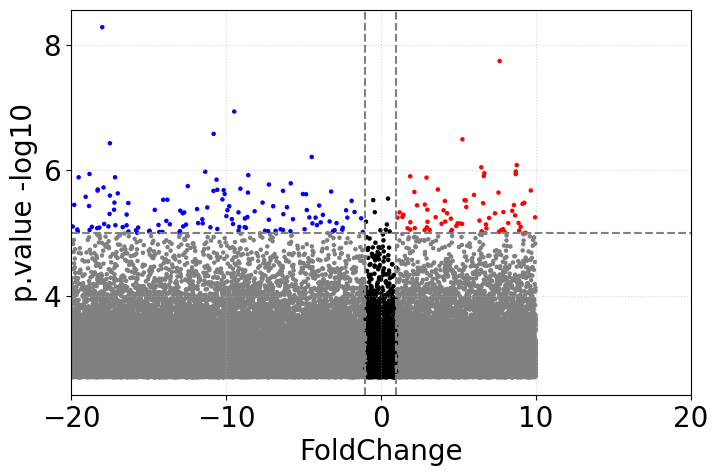

In [45]:
#volcano plot
colors = ['blue' if x < -1 and -numpy.log10(y) > 5 
          else 'red' if x > 1 and -numpy.log10(y) > 5
          else 'black' if x > -1 and x < 1
          else 'grey' for x, y in zip(df2['Fold_rand'], df2['pvalue_rand'])]

# Plot, after convertion  y to log10(pvalue)
plt.scatter(x=df2['Fold_rand'],y=df2['pvalue_rand'].apply(lambda x:-numpy.log10(x)),s=5,  c=colors) 
plt.xlim(-20, 20)
plt.xlabel("FoldChange")
plt.ylabel("p.value -log10")

plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(5,color="grey",linestyle="--")

title_file = 'volcano_NPC_H3K36me3'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')

## Try to pull both to get FC ko and FC WT on the same plot
The main issue is that each point (gene) need to have a X (FC from KO) and a Y (FC from WT). 
By taking only the significant ones, obviously some genes will be in the list of the KO but not in the WT (have a X but not a Y). 
→ The solution is to do a selection of genes, per example the genes from KO and see the FC of these genes in the WT. With this method we will not see the significant one, except if I work on having a different color/contrast.

## Questions? 
We want to answer 1) if we can see loss of H3K36me3 at 37°C for genes in SMYD5 KO condition for genes that have loss of H3K36me3 at 32°C in SMYD5 WT and 2) vice versa. Question 1 is our primary question and 2 is a bonus question

1) We want to know if, in SMYD5-KO condition, there is a loss of H3K36me3 at 37°C for the genes that have a loss of H3K36me3 at 32°C in the WT condition.

2) Secondary, we want to know if, in SMYD5-KO condition, there is a loss of H3K36me3 at 32°C for the genes that have a loss of H3K36me3 at 37°C in the WT condition.

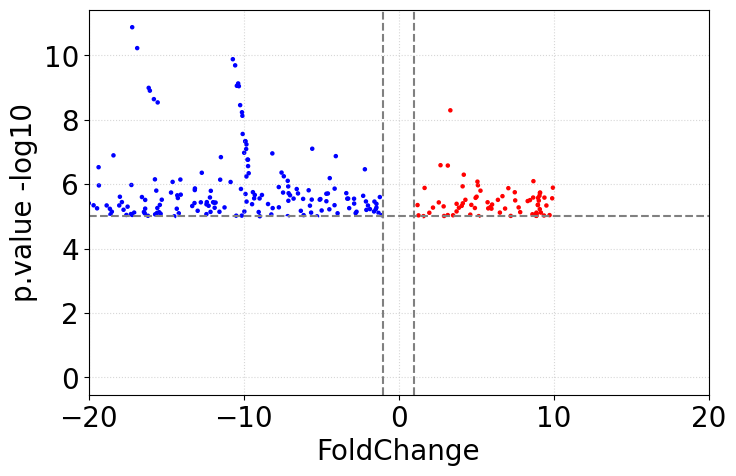

In [74]:
#volcano plot
colors = ['blue' if x < -1 and -numpy.log10(y) > 5 
          else 'red' if x > 1 and -numpy.log10(y) > 5
          else 'white' if x > -1 and x < 1
          else 'white' for x, y in zip(df['Fold'], df['p.value'])]

colors2 = ['blue' if x < -1 and -numpy.log10(y) > 5 
          else 'red' if x > 1 and -numpy.log10(y) > 5
          else 'white' if x > -1 and x < 1
          else 'white' for x, y in zip(df2['Fold_rand'], df2['pvalue_rand'])]

# Plot, after convertion  y to log10(pvalue)
plt.scatter(x=df['Fold'],y=df['p.value'].apply(lambda x:-numpy.log10(x)),s=5,  c=colors) 
plt.scatter(x=df2['Fold_rand'],y=df2['pvalue_rand'].apply(lambda x:-numpy.log10(x)),s=5,  c=colors2) 

plt.xlim(-20, 20)
plt.xlabel("FoldChange")
plt.ylabel("p.value -log10")

plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(5,color="grey",linestyle="--")

title_file = 'volcano_NPC_H3K36me3'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')

In [95]:
df.head()

,Fold,p.value
SYMBOL,,
SMG1P6,-17.182478,1.322149e-11
NBPF15,-16.860628,5.894429e-11
CENPE,-10.689641,1.304364e-10
NSMAF,-10.539568,2.025052e-10
YEATS2,-10.345687,7.394206e-10


In [ ]:
df = df[['Fold', 'p.value']]
df2.set_index('SYMBOL', inplace = True, drop = True)
df2.head(1)

In [93]:
print(df.shape, df2.shape)

(42879, 2) (42879, 2)


In [89]:
#Selection of the data
red_wt = df[ (df['Fold'] > -1) | (-numpy.log10(df['p.value']) > 5)]
red_ko = df2[ (df2['Fold_rand'] > -1) | (-numpy.log10(df2['pvalue_rand']) > 5)]

In [99]:
df.head(2)

,Fold,p.value
SYMBOL,,
SMG1P6,-17.182478,1.322149e-11
NBPF15,-16.860628,5.894429e-11


In [98]:
df2.head(2)

,Fold_rand,pvalue_rand
SYMBOL,,
SMG1P6,-5.640150,0.000751
NBPF15,-12.481159,0.001621


In [ ]:
# df with gene name
df_test = df1.merge(df)

In [80]:
df_test = pandas.DataFrame()
df_test.index = 
df_test['wt_fc'] = red_wt[['Fold']]
df_test['ko_fc'] = red_ko[['Fold_rand']]

df_test.head()

,wt_fc,ko_fc
0,-17.182478,NaN
1,-16.860628,NaN
2,-10.689641,0.938788
3,-10.539568,NaN
4,-10.345687,1.882197


In [91]:
red_wt

,Fold,p.value
SYMBOL,,
SMG1P6,-17.182478,1.322149e-11
NBPF15,-16.860628,5.894429e-11
CENPE,-10.689641,1.304364e-10
NSMAF,-10.539568,2.025052e-10
YEATS2,-10.345687,7.394206e-10
...,...,...
CDC37,-0.000023,9.999072e-01
ZNF639,0.000006,9.999253e-01
ANXA2,0.000036,9.999322e-01


In [64]:
len(red_wt)

42358

In [63]:
len(red_ko)

15727

ValueError: x and y must be the same size

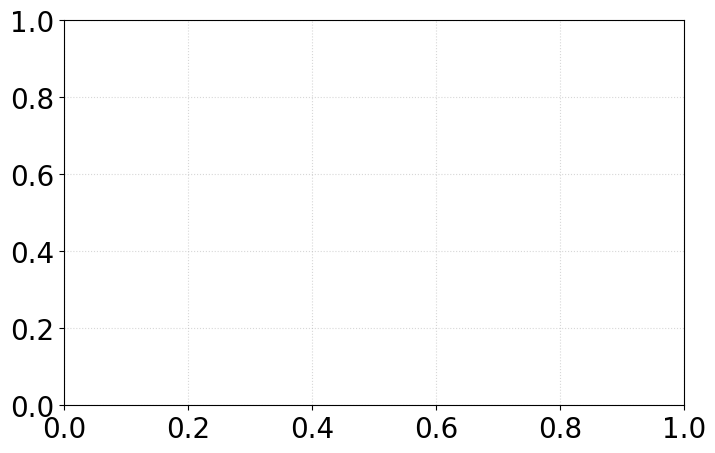

In [70]:
plt.scatter(x=red_wt['Fold'],y=red_ko['Fold_rand'],s=5) 


In [ ]:
# Only select the red ?

## Heatmap

In [42]:
df.shape

(42879, 16)

In [43]:
#select the interesting genes

df_hm = df[ (df['Fold'] > 1) | (df['Fold'] < -1) ]
df_hm = df_hm[ (df_hm['p.value'] < 10e-6) ]

print(df_hm.shape)

max_pval = df_hm['p.value'].max()
print(f'highest pvalue is {max_pval}')

df_hm = df_hm[['SYMBOL', 'Fold','p.value']]
df_hm.head()

(35, 16)
highest pvalue is 9.65779871320066e-06


,SYMBOL,Fold,p.value
0,SMG1P6,-17.182478,1.322149e-11
1,NBPF15,-16.860628,5.894429e-11
2,CENPE,-10.689641,1.304364e-10
3,NSMAF,-10.539568,2.025052e-10
4,YEATS2,-10.345687,7.394206e-10


In [158]:
# # convert FC to Log10(FC)
# ## Nan for negative, so I use for absolute 
# df_hm['log10(FC)'] = numpy.log10(numpy.abs(df_hm['Fold']))

# # Reintroduce the sign for negative values
# df_hm.loc[df_hm['Fold'] < 0, 'log10(FC)'] *= -1

In [44]:
print(df_hm['Fold'].min(), df_hm['Fold'].max())

-17.1824781488926 9.13261956579626


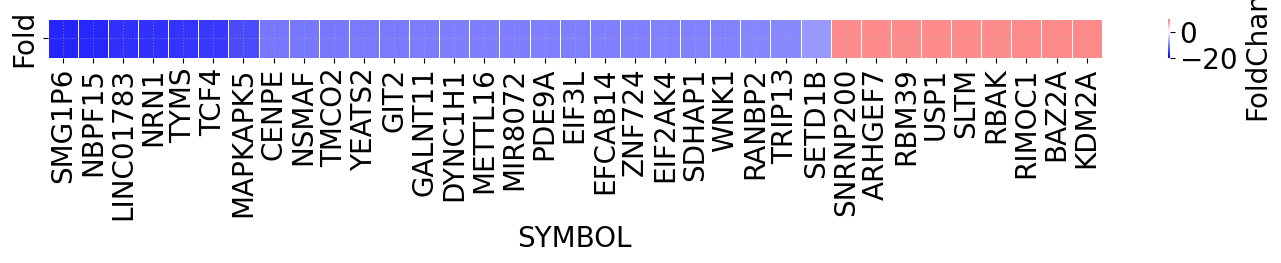

In [45]:
data = df_hm[['SYMBOL','Fold']]
data = data.sort_values(['Fold'], ascending = True)
data
data.set_index('SYMBOL', inplace= True)

plt.subplots(figsize=(17,0.5))
seaborn.heatmap(data.T, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-20, vmax=10,
               cbar_kws={'label': 'FoldChange'})

title_file = 'Heatmap_NPC_H3K36me3'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')

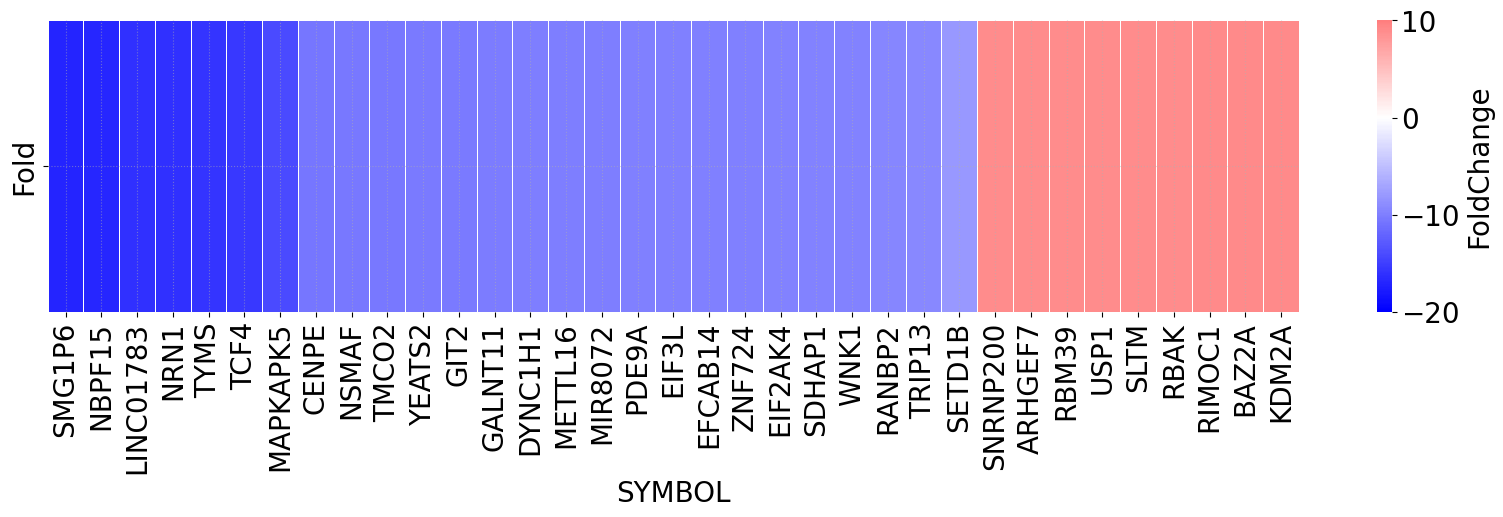

In [46]:
# again bigger, just to get bigger Legend.
plt.subplots(figsize=(17,4))
plt.tight_layout()
seaborn.heatmap(data.T, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-20, vmax=10,
               cbar_kws={'label': 'FoldChange'})

title_file = 'Heatmap_NPC_H3K36me3_legend'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')